In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [4]:
cb = pd.read_excel("Chargeback_Tracking.xlsx")

In [5]:
bsad = pd.read_excel("BSAD.xlsx")

In [6]:
bseg = pd.read_excel("BSEG.xlsx")

In [7]:
bseg

,Unnamed: 0,Document_No,Itm,Clearing_Date,Clrng_Doc_No,D/C,Bus_Area,CB_Amount,Actual_CB_Amount,G/L,Cust_Acct_No,Reason_Cd,Reason_Cd_Desc,Account Group,Account Name
0,0,100003570,1,NaT,NaN,S,NaN,103.00,103.00,1111001,6052337.0,CDI,Discount,Balance Sheet,A/R RECONCILIATION
1,2,100003583,1,NaT,NaN,S,NaN,21.95,21.95,1111290,NaN,184,CDI Corrections,Balance Sheet,RESERVE FOR CASH DISCOUNTS
2,6,100003584,1,NaT,NaN,S,USAC,8.58,8.58,1111290,NaN,184,CDI Corrections,Balance Sheet,RESERVE FOR CASH DISCOUNTS
3,10,100003586,1,NaT,NaN,S,USAC,3.25,3.25,1111290,NaN,184,CDI Corrections,Balance Sheet,RESERVE FOR CASH DISCOUNTS
4,15,100003662,1,NaT,NaN,S,PTK,0.16,0.16,1111290,NaN,184,CDI Corrections,Balance Sheet,RESERVE FOR CASH DISCOUNTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33787,21984,1600000017,1,NaT,NaN,S,NaN,39.06,39.06,1111001,6055334.0,CDI,Discount,Balance Sheet,A/R RECONCILIATION
33788,21986,1600000018,1,NaT,NaN,S,NaN,22.08,22.08,1111001,6055334.0,CDI,Discount,Balance Sheet,A/R RECONCILIATION
33789,21988,1600000019,1,NaT,NaN,S,NaN,1.59,1.59,1111001,6055334.0,CDI,Discount,Balance Sheet,A/R RECONCILIATION
33790,21990,1600000020,1,NaT,NaN,S,NaN,1.59,1.59,1111001,6055334.0,CDI,Discount,Balance Sheet,A/R RECONCILIATION


In [8]:
bseg['Write_Off'] = [0 if i== 'Balance Sheet' else 1 for i in bseg['Account Group']]

In [9]:
wo = []
cdn = []
for index,i in enumerate(bseg['Write_Off']):
    if i==1:
        wo.append(bseg.loc[index, 'Actual_CB_Amount'])
        cdn.append(bseg.loc[index, 'Document_No'])

In [10]:
cb['Write_Off'] = cb['Clrng_Doc_No'].isin(cdn)

In [11]:
cb['Write_Off'] = cb['Write_Off']*1

In [12]:
cb

,Document_No,Line_Itm_No,Unique_Doc_No,CB_Created_Year,Days_taken_to_Clear,Clrng_Doc_No,CB_Closed_Month,Chargeback_Amount,Reason_Cd,Reason_Cd_Desc,...,Latitude,Longitude,State,Field_Rep_Code_y,Credit_Limit,Credit_Balance,Cred_Bal%,Prev_Sale_Amount,Cust_Risk_Category,Write_Off
0,1400009895,1,14000098951,2013,1916,100362129,3,7057.45,CDI,Discount,...,44.993940,-73.364983,New York,B7,15000000.0,10189229.05,67.93,24160273.66,MED,1
1,1400004560,1,14000045601,2013,1915,100362129,3,666.26,CDI,Discount,...,44.993940,-73.364983,New York,B7,15000000.0,10189229.05,67.93,24160273.66,MED,1
2,100040078,1,1000400781,2014,1887,100362129,3,284.78,CFD,Field Destroy,...,44.993940,-73.364983,New York,B7,15000000.0,10189229.05,67.93,24160273.66,MED,1
3,1400039311,32,140003931132,2014,1881,100362129,3,119.82,CDI,Discount,...,44.993940,-73.364983,New York,B7,15000000.0,10189229.05,67.93,24160273.66,MED,1
4,1400039311,33,140003931133,2014,1881,100362129,3,75.75,CDI,Discount,...,44.993940,-73.364983,New York,B7,15000000.0,10189229.05,67.93,24160273.66,MED,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128250,100595484,1,1005954841,2020,0,100595503,7,8.13,CTX,Sales Tax,...,42.497469,-94.168016,Iowa,D1,5000.0,14.71,0.29,2441.64,MED,0
128251,100595488,1,1005954881,2020,0,100595503,7,56.15,CTX,Sales Tax,...,42.497469,-94.168016,Iowa,D1,5000.0,14.71,0.29,2441.64,MED,0
128252,100595490,1,1005954901,2020,0,100595503,7,10.59,CTX,Sales Tax,...,42.497469,-94.168016,Iowa,D1,5000.0,14.71,0.29,2441.64,MED,0
128253,100595491,1,1005954911,2020,0,100595503,7,6.15,CTX,Sales Tax,...,42.497469,-94.168016,Iowa,D1,5000.0,14.71,0.29,2441.64,MED,0


In [13]:
#cb.to_excel(r'B:\Pred_Mod_Data.xlsx', index = False)

In [14]:
states = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming", "United States Vigin Islands":"VI"}

In [15]:
states = {value : key for (key, value) in states.items()}

In [16]:
State_Code = []
for state in cb.State:
    if state in states:
        State_Code.append(states[state])
    else:
        State_Code.append('')

In [17]:
cb['State_Code'] = State_Code

In [18]:
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN', 'VI' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    
cb['Region'] = cb['State_Code'].apply(finding_regions)

# drop rows without region value
cb.dropna(subset=['Region'],inplace=True)

In [19]:
#Reason_Code_Category cat1(CB above $4 mil), cat2($1mil-$4mil), cat3(>$200k), cat4(<$200k)
cat1 = ['CSS', 'TPR', 'TRB', 'CPR', 'TPE']
cat2 = ['CDI', 'CNS', 'CMI', 'CUI', 'TVC', 'CRT', 'CFD']
cat3 = ['CDF', 'CSR', 'TRA', 'CDD', 'CRB', 'CSP', 'TAD', 'TSD', 'CWE']

def finding_risk_cats(rsk):
    if rsk in cat1:
        return 'cat1'
    elif rsk in cat2:
        return 'cat2'
    elif rsk in cat3:
        return 'cat3'
    else:
        return 'cat4'
    
    
cb['Risk_Cd_Cat'] = cb['Reason_Cd'].apply(finding_risk_cats)

# drop rows without region value
#df.dropna(subset=['risk_cd_cat'],inplace=True)

In [20]:
#Field Rep Category grp1(Avg days to close >180 days), grp2(120-180 days), grp3(less than 120 days)
grp1 = ['B8', 'B3', 'B6', 'N1', 'N3', 'M2', 'B1', 'B4', 'W1', 'B5', 'B7', 'A3', 'N2', 'A6', 'W3', 'D4']
grp2 = ['A7', 'A2', 'D2', 'N4', 'A6', 'W3', 'D4']


def finding_fldrep_cats(grp):
    if grp in grp1:
        return 'grp1'
    elif grp in grp2:
        return 'grp2'
    else:
        return 'grp3'
    
    
cb['Fld_Rep_Cat'] = cb['Field_Rep_Code_y'].apply(finding_fldrep_cats)

In [21]:
cb.Write_Off.value_counts()

0    117907
1     10250
Name: Write_Off, dtype: int64

In [22]:
cb = cb[['Unique_Doc_No', 'Days_taken_to_Clear',
       'Chargeback_Amount','Bus_Area',
         'Credit_Limit',
       'Credit_Balance', 'Cred_Bal%', 'Cust_Risk_Category',
         'Region', 'Fld_Rep_Cat', 'Risk_Cd_Cat','Write_Off']]

In [23]:
cb

,Unique_Doc_No,Days_taken_to_Clear,Chargeback_Amount,Bus_Area,Credit_Limit,Credit_Balance,Cred_Bal%,Cust_Risk_Category,Region,Fld_Rep_Cat,Risk_Cd_Cat,Write_Off
0,14000098951,1916,7057.45,ND,15000000.0,10189229.05,67.93,MED,NorthEast,grp1,cat2,1
1,14000045601,1915,666.26,ND,15000000.0,10189229.05,67.93,MED,NorthEast,grp1,cat2,1
2,1000400781,1887,284.78,ND,15000000.0,10189229.05,67.93,MED,NorthEast,grp1,cat2,1
3,140003931132,1881,119.82,ND,15000000.0,10189229.05,67.93,MED,NorthEast,grp1,cat2,1
4,140003931133,1881,75.75,ND,15000000.0,10189229.05,67.93,MED,NorthEast,grp1,cat2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
128250,1005954841,0,8.13,PTK,5000.0,14.71,0.29,MED,MidWest,grp3,cat4,0
128251,1005954881,0,56.15,PTK,5000.0,14.71,0.29,MED,MidWest,grp3,cat4,0
128252,1005954901,0,10.59,PTK,5000.0,14.71,0.29,MED,MidWest,grp3,cat4,0
128253,1005954911,0,6.15,PTK,5000.0,14.71,0.29,MED,MidWest,grp3,cat4,0


In [24]:
cb.dtypes

Unique_Doc_No            int64
Days_taken_to_Clear      int64
Chargeback_Amount      float64
Bus_Area                object
Credit_Limit           float64
Credit_Balance         float64
Cred_Bal%              float64
Cust_Risk_Category      object
Region                  object
Fld_Rep_Cat             object
Risk_Cd_Cat             object
Write_Off                int32
dtype: object

In [25]:
cb = pd.get_dummies(cb)
print(cb.shape)

(128157, 43)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128157 entries, 0 to 128254
Data columns (total 43 columns):
Unique_Doc_No               128157 non-null int64
Days_taken_to_Clear         128157 non-null int64
Chargeback_Amount           128157 non-null float64
Credit_Limit                128157 non-null float64
Credit_Balance              128157 non-null float64
Cred_Bal%                   128157 non-null float64
Write_Off                   128157 non-null int32
Bus_Area_BAND               128157 non-null uint8
Bus_Area_BDTM               128157 non-null uint8
Bus_Area_CACC               128157 non-null uint8
Bus_Area_HTLS               128157 non-null uint8
Bus_Area_ND                 128157 non-null uint8
Bus_Area_PRTO               128157 non-null uint8
Bus_Area_PTE                128157 non-null uint8
Bus_Area_PTI                128157 non-null uint8
Bus_Area_PTIC               128157 non-null uint8
Bus_Area_PTK                128157 non-null uint8
Bus_Area_PTL                128

In [27]:
cb = cb.drop('Unique_Doc_No', axis=1)

In [28]:
cb.isnull().sum()

Days_taken_to_Clear         0
Chargeback_Amount           0
Credit_Limit                0
Credit_Balance              0
Cred_Bal%                   0
Write_Off                   0
Bus_Area_BAND               0
Bus_Area_BDTM               0
Bus_Area_CACC               0
Bus_Area_HTLS               0
Bus_Area_ND                 0
Bus_Area_PRTO               0
Bus_Area_PTE                0
Bus_Area_PTI                0
Bus_Area_PTIC               0
Bus_Area_PTK                0
Bus_Area_PTL                0
Bus_Area_PTM                0
Bus_Area_PTO                0
Bus_Area_PTP                0
Bus_Area_PTQ                0
Bus_Area_PWRS               0
Bus_Area_UICI               0
Bus_Area_ULWH               0
Bus_Area_ULWI               0
Bus_Area_USAC               0
Cust_Risk_Category_EXTRM    0
Cust_Risk_Category_HIG      0
Cust_Risk_Category_LOW      0
Cust_Risk_Category_MED      0
Region_MidWest              0
Region_NorthEast            0
Region_SouthEast            0
Region_Sou

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y = cb['Write_Off']
X = cb.drop('Write_Off',axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [41]:
#from imblearn import under_sampling 
#from imblearn import over_sampling
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=12, ratio = 1.0)
#X_train, y_train = sm.fit_sample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

AUC estimate: 0.874
Mean accuracy score: 0.936
[[34826   523]
 [ 1953  1146]]
Weighted F1 Score: 0.927
Recall: 0.3697967086156825
Precision: 0.6866387058118634


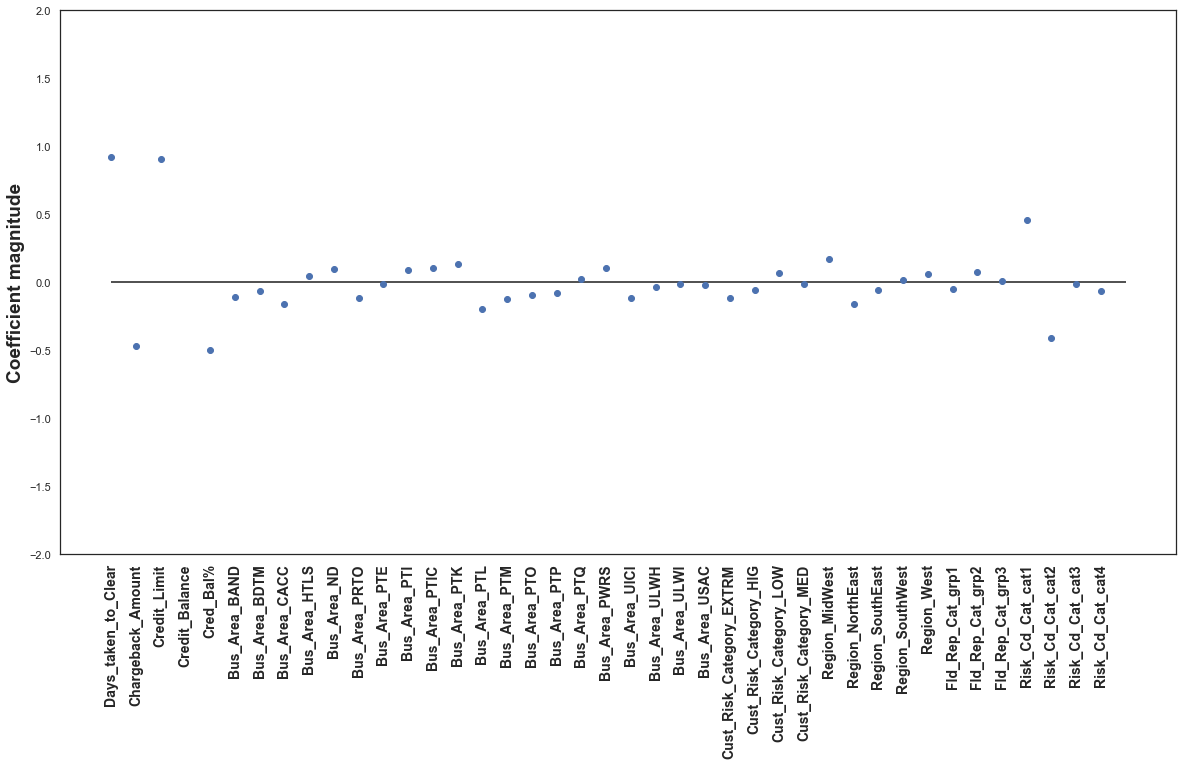

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score


log_reg = LogisticRegression(C = 1000,random_state=42)
log_reg.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(log_reg.coef_.T, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90, fontweight='bold', fontsize=14)
plt.hlines(0, 0, X.shape[1])
plt.ylim(-2, 2)
plt.ylabel("Coefficient magnitude", fontsize=19, fontweight='bold')

# generate evaluation metrics

probs = log_reg.predict_proba(X_test)
predicted = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc_lr = round(roc_auc_score(y_test, probs[:, 1]),3)
f1_score_lr = f1_score(y_test, predicted, average = 'weighted')
print(f'AUC estimate: {auc_lr:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(confusion_matrix(y_test, predicted))
print(f'Weighted F1 Score: {f1_score_lr:.3}')
print(f'Recall:', recall_score(y_test, predicted))
print(f'Precision:', precision_score(y_test, predicted))

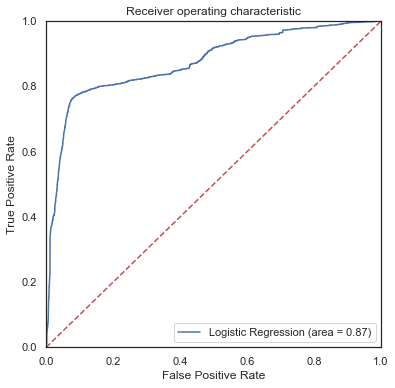

In [43]:
# ROC curve

fpr_lr, tpr_lr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [44]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
probs = clf.predict_proba(X_test)
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc_clf = round(roc_auc_score(y_test, probs[:, 1]),3)
f1_score_clf = f1_score(y_test, predicted, average = 'weighted')

# generate evaluation metrics
print(f'AUC estimate: {auc_clf:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(confusion_matrix(y_test, predicted))
print(f'Weighted F1 Score: {f1_score_clf:.3}')
print(f'Recall:', recall_score(y_test, predicted))
print(f'Precision:', precision_score(y_test, predicted))

AUC estimate: 0.889
Mean accuracy score: 0.966
[[34691   658]
 [  652  2447]]
Weighted F1 Score: 0.966
Recall: 0.7896095514682155
Precision: 0.7880837359098228


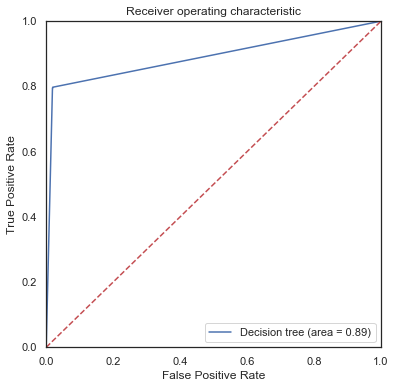

In [46]:
# ROC curve

fpr_clf, tpr_clf, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr_clf, tpr_clf, label='Decision tree (area = %0.2f)' % auc_clf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DecisionTree_ROC')
plt.show()

In [47]:
x = cb.drop('Write_Off',axis=1)
feature_importances = pd.DataFrame(clf.feature_importances_, index = x.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Days_taken_to_Clear,0.390540
Risk_Cd_Cat_cat1,0.155346
Chargeback_Amount,0.127837
Cred_Bal%,0.107802
Credit_Balance,0.065966
Credit_Limit,0.058817
Region_SouthEast,0.008320
Region_NorthEast,0.006927
Bus_Area_PWRS,0.006718
Cust_Risk_Category_HIG,0.006374


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=3, max_features='log2', oob_score=True,  random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [49]:
# generate evaluation metrics

probs = rf.predict_proba(X_test)
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
auc_rf = round(roc_auc_score(y_test, probs[:, 1]),3)
f1_score_rf = f1_score(y_test, predicted, average = 'weighted')

print(f'AUC estimate: {auc_rf:.3}')
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(confusion_matrix(y_test, predicted))
print(f'Weighted F1 Score: {f1_score_rf:.3}')
print(f'Recall:', recall_score(y_test, predicted))
print(f'Precision:', precision_score(y_test, predicted))

AUC estimate: 0.916
Out-of-bag score estimate: 0.921
Mean accuracy score: 0.919
[[35349     0]
 [ 3099     0]]
Weighted F1 Score: 0.881
Recall: 0.0
Precision: 0.0


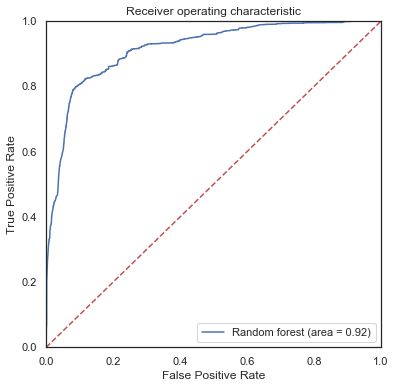

In [50]:
# ROC curve

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr_rf, tpr_rf, label='Random forest (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()

In [51]:
x = cb.drop('Write_Off',axis=1)

In [52]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = x.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Days_taken_to_Clear,0.203681
Risk_Cd_Cat_cat2,0.179019
Risk_Cd_Cat_cat1,0.173569
Chargeback_Amount,0.100224
Credit_Balance,0.077912
Cred_Bal%,0.050417
Bus_Area_ND,0.049549
Credit_Limit,0.042197
Fld_Rep_Cat_grp1,0.016158
Region_NorthEast,0.015854


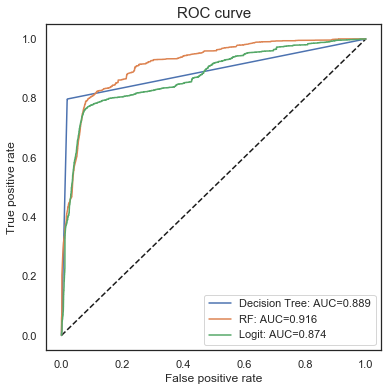

In [53]:
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_clf, tpr_clf, label='Decision Tree: AUC='+str(auc_clf));
plt.plot(fpr_rf, tpr_rf, label=('RF: AUC='+ str(auc_rf)));
plt.plot(fpr_lr, tpr_lr, label='Logit: AUC='+str(auc_lr));
plt.xlabel('False positive rate',fontsize='12')
plt.ylabel('True positive rate',fontsize='12')
plt.title('ROC curve', fontsize='15')
plt.legend(loc='best')
plt.savefig('ROC.png', dpi=500)